In [110]:
import ugradio
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import dish
import cartopy.crs as ccrs
from scipy.interpolate import interp2d
from tqdm import tqdm, trange
%matplotlib inline

In [26]:
gal_b = []
gal_l = []
bs = np.arange(-70, -8, 2)
for b in bs:
    ls = np.arange(160, 220.1, 2/np.cos(b*np.pi/180))
    for l in ls:
        np.array(gal_b.append(b))
        np.array(gal_l.append(l))

In [27]:
x, y = np.meshgrid(gal_l, gal_b)

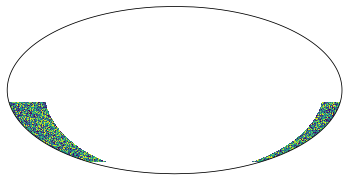

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.Mollweide()})

temp=np.random.rand(len(x),len(y)) #replace with real data
ax.imshow(temp,extent=[160,220,-70,-10], transform=ccrs.PlateCarree())

#TO-DO: rotate and crop

plt.grid()
plt.show()

In [130]:
def calibrate(data_nd0, data_nd1, pol):
    diff = np.array(data_nd1) - np.array(data_nd0)
    if pol == 0:
        T = 90
    elif pol == 1:
        T = 65
    else: print('Bruh its literally either a 0 or 1 you cant fuck it up')
    G = T/diff
    t_line = G * data_nd0
    return t_line
def calibrate1(data_nd0, data_nd1, pol):
    diff = np.median(np.array(data_nd1) - np.array(data_nd0))
    if pol == 0:
        T = 90
    elif pol == 1:
        T = 65
    else: print('Bruh its literally either a 0 or 1 you cant fuck it up')
    G = T/diff
    t_line = G * data_nd0
    return t_line

In [129]:
def interp(data, L_t, B_t, L_m, B_m):
    spline = interp2d(L_m, B_m, data)
    t_interp = spline(L_t, B_t)
    return t_interp

In [38]:
#DO NOT RUN THIS CELL UNTIL DATA IS COLLECTED

size = 700
temp = np.empty((size, size))
l = np.linspace(160,220,size)
b = np.linspace(-70,-10,size)
L, B = np.meshgrid(l,b)

for i in range(size):
    for j in range(size):
        temp[i,j] = interp(temp, L[i], B[j], gal_l, gal_b)

ValueError: Invalid length for input z for non rectangular grid

In [39]:
nfiles = 350
nspec = 50
nfreq = 8192

list_0 = np.empty((nfiles, nspec, nfreq))
list_1 = np.empty((nfiles, nspec, nfreq))

for i in trange(nfiles):
    
    f = fits.open(f'lab4_data/{i}_nd0.fits')
    
    for j in range(nspec):
        
        list_0[i,j] = f[j+1].data['auto0_real']
        
        list_1[i,j] = f[j+1].data['auto1_real']

100%|██████████| 350/350 [01:20<00:00,  4.32it/s]


In [41]:
noise_spec = 5

noise_0 = np.empty((nfiles, noise_spec, nfreq))
noise_1 = np.empty((nfiles, noise_spec, nfreq))

for i in trange(nfiles):
    
    f = fits.open(f'lab4_data/{i}_nd1.fits')
    
    for j in range(noise_spec):
        
        noise_0[i,j] = f[j+1].data['auto0_real']
        
        noise_1[i,j] = f[j+1].data['auto1_real']

100%|██████████| 350/350 [00:08<00:00, 39.58it/s]


In [131]:
# mean_specs_0 = np.mean(list_0, axis=1)
# mean_specs_1 = np.mean(list_1, axis=1)
# median_specs_0 = np.median(list_0, axis=1)
# median_specs_1 = np.median(list_1, axis=1)
# mean_noise_0 = np.mean(noise_0, axis=1)
# mean_noise_1 = np.mean(noise_1, axis=1)
# median_noise_0 = np.median(noise_0, axis=1)
# median_noise_1 = np.median(noise_1, axis=1)
tline_0 = calibrate(mean_specs_0, mean_noise_0, 0)
tline_1 = calibrate(mean_specs_1, mean_noise_1, 1)
Tline_0 = calibrate1(median_specs_0, median_noise_0, 0)
Tline_1 = calibrate1(median_specs_1, median_noise_1, 1)

# def calibrate(data_nd0, data_nd1, pol):
#     diff = np.array(data_nd1) - np.array(data_nd0)
#     if pol == 0:
#         T = 90
#     elif pol == 1:
#         T = 65
#     else: print('Bruh its literally either a 0 or 1 you cant fuck it up')
#     G = T/diff
#     t_line = G * data_nd0
#     return t_line
tline_0

<ipython-input-130-35e9478df709>:8: RuntimeWarning: divide by zero encountered in true_divide
  G = T/diff
<ipython-input-130-35e9478df709>:9: RuntimeWarning: invalid value encountered in multiply
  t_line = G * data_nd0


array([[         nan,          nan, 157.56529304, ...,          nan,
                 nan,          nan],
       [         nan,          nan, 131.1796444 , ...,          nan,
                 nan,          nan],
       [         nan,          nan, 157.54065581, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan, 163.98669044, ...,          nan,
                 nan,          nan],
       [         nan,          nan, 196.04648389, ...,          nan,
                 nan,          nan],
       [         nan,          nan, 147.27677439, ...,          nan,
                 nan,          nan]])

Text(0.5, 0.98, 'Test Data Power Spectra')

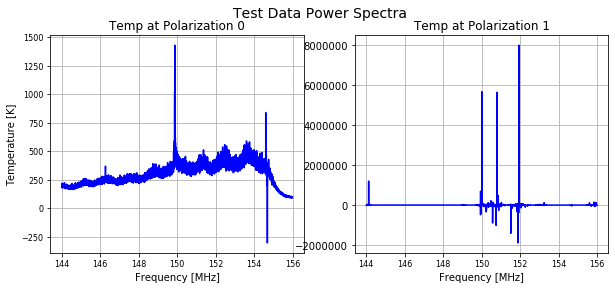

In [132]:
freq = np.linspace(144,156,8192)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(10,4))

ax1.plot(freq, tline_0[200], color='b')
ax1.set_title('Temp at Polarization 0', fontsize=12)
ax1.set_xlabel('Frequency [MHz]', fontsize=10)
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
ax1.set_ylabel('Temperature [K]', fontsize=10)
ax1.grid()

ax2.plot(freq, tline_1[200], color='b')
ax2.set_title('Temp at Polarization 1', fontsize=12)
ax2.set_xlabel('Frequency [MHz]')
ax2.xaxis.set_tick_params(labelsize=8)
ax2.grid()

fig.suptitle('Test Data Power Spectra', fontsize=14)

Text(0.5, 0.98, 'Test Data Power Spectra')

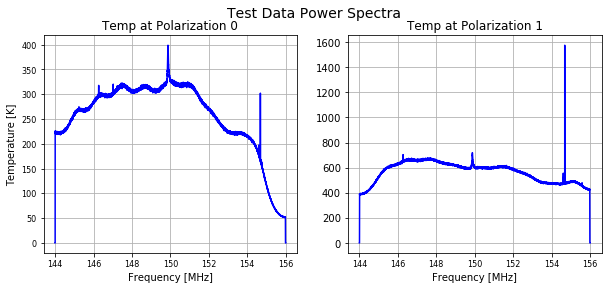

In [133]:
freq = np.linspace(144,156,8192)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(10,4))

ax1.plot(freq, Tline_0[200], color='b')
ax1.set_title('Temp at Polarization 0', fontsize=12)
ax1.set_xlabel('Frequency [MHz]', fontsize=10)
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
ax1.set_ylabel('Temperature [K]', fontsize=10)
ax1.grid()

ax2.plot(freq, Tline_1[200], color='b')
ax2.set_title('Temp at Polarization 1', fontsize=12)
ax2.set_xlabel('Frequency [MHz]')
ax2.xaxis.set_tick_params(labelsize=8)
ax2.grid()

fig.suptitle('Test Data Power Spectra', fontsize=14)

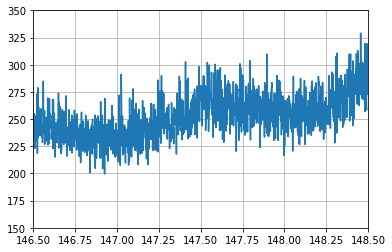

In [117]:
plt.plot(freq, tline_0[200])
plt.xlim(146.5,148.5)
plt.ylim(150,350)
plt.grid()
plt.show()

In [118]:
cond = np.abs(tline_0[200]) > 320
cond2 = 200 > np.abs(tline_0[200])
cond3 = cond*cond2
tline_0[200][cond3] = 0 

In [103]:
truncated_signal = tline_0[200][cond3]

In [104]:
truncated_signal

array([], dtype=float64)

In [105]:
plt.plot(freq, truncated_signal)
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (8192,) and (0,)